In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import Dataset
import seaborn as sns

In [123]:
Data = pd.read_csv('../Cluster1Mondayn.csv', index_col='Time', parse_dates=True)

In [124]:
data = Data.drop(['dayofyear', 'month', 'dayofweek', 'hourofday', 'minuteofday', 'daytype', 'season'], axis=1)

In [125]:
def split_sequence(sequence, n_steps):
    X, Y = list(), list()
    for i in range(len(sequence)):
        
        end_ix = i + n_steps
        
        if end_ix > len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x) 
        Y.append(seq_y)
    return np.array(X), np.array(Y)

n_steps = 3
X, Y = split_sequence(data.values, n_steps)

In [122]:
class Energy_Series(Dataset):
    def __init__(self, features, targets):
        self.features = features
        self.targets = targets
        
    def __len__(self):
        return len(self.features)
    
    def __getitem__(self, idx):
        x = self.features[idx]
        y = self.targets[idx]
        
        return x, y

In [6]:
class MLP(nn.Module):
    def __init__(self, in_features):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(in_features, 64)
        self.fc2 = nn.Linear(64,100)
        self.fc3 = nn.Linear(100, 1)
        self.relu = nn.ReLU(inplace=True)
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [7]:
device = torch.device('cpu')
model = MLP(3).to(device).float()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
criterion = nn.MSELoss()

In [8]:
train = Energy_Series(X.reshape(X.shape[0],X.shape[1],1),Y)
train_loader = torch.utils.data.DataLoader(train,batch_size=2,shuffle=False)

In [19]:
train_losses = []
def Train():
    running_loss = 0
    
    model.train() 
    
    for idx, (inputs,labels) in enumerate(train_loader):
        inputs = inputs.to(device).squeeze(2).float()
        labels = labels.to(device).float()
        optimizer.zero_grad()
        preds = model(inputs)
        loss = criterion(preds,labels)
        loss.backward(retain_graph=True)
        optimizer.step()
        running_loss += loss.item()
        
        #del loss, inputs, labels, preds, 
        
    train_loss = running_loss/len(train_loader)
    train_losses.append(train_loss)
    
    print(f'train_loss {train_loss}')

In [32]:
next(iter(train_loader))[0].shape

torch.Size([2, 3, 1])

In [17]:
a = MLP(3)
a(torch.randn(5, 3)).shape

torch.Size([5, 1])

In [20]:
epochs = 500
for epoch in range(epochs):
    print('epochs {}/{}'.format(epoch+1,epochs))
    Train()

epochs 1/500
train_loss 0.0014833612045534322
epochs 2/500
train_loss 0.0014482146183253295
epochs 3/500
train_loss 0.001420969805257564
epochs 4/500
train_loss 0.0013550660197200995
epochs 5/500
train_loss 0.0013078904157902526
epochs 6/500
train_loss 0.0012690120006482925
epochs 7/500
train_loss 0.0012549060393787987
epochs 8/500
train_loss 0.001212134066806825
epochs 9/500
train_loss 0.001189142119590991
epochs 10/500
train_loss 0.0011710402860606996
epochs 11/500
train_loss 0.0011502824792077489
epochs 12/500
train_loss 0.0011355612081234774
epochs 13/500
train_loss 0.0011200503749472855
epochs 14/500
train_loss 0.0011024961551522904
epochs 15/500
train_loss 0.001089845698402449
epochs 16/500
train_loss 0.001077689250659516
epochs 17/500
train_loss 0.0010657152981694564
epochs 18/500
train_loss 0.001055539151564163
epochs 19/500
train_loss 0.0010429035240662968
epochs 20/500
train_loss 0.0010380865058279682
epochs 21/500
train_loss 0.0010210827407924152
epochs 22/500
train_loss 0.0

train_loss 0.0006730367101493359
epochs 176/500
train_loss 0.0006715376934418601
epochs 177/500
train_loss 0.0006702432347293264
epochs 178/500
train_loss 0.0006716976931633536
epochs 179/500
train_loss 0.0006705307910913615
epochs 180/500
train_loss 0.0006675544873720987
epochs 181/500
train_loss 0.0006697226668026752
epochs 182/500
train_loss 0.0006687870696713609
epochs 183/500
train_loss 0.000668038676412651
epochs 184/500
train_loss 0.0006676511497110225
epochs 185/500
train_loss 0.0006661860254325837
epochs 186/500
train_loss 0.0006670751309210941
epochs 187/500
train_loss 0.0006669694360920505
epochs 188/500
train_loss 0.0006645855171802035
epochs 189/500
train_loss 0.0006644440171839652
epochs 190/500
train_loss 0.0006654155425265082
epochs 191/500
train_loss 0.0006606755530291938
epochs 192/500
train_loss 0.0006647944005456576
epochs 193/500
train_loss 0.0006627712099221117
epochs 194/500
train_loss 0.0006606387426740739
epochs 195/500
train_loss 0.0006613674754803605
epochs 1

train_loss 0.0006398657341515524
epochs 347/500
train_loss 0.0006395722048887472
epochs 348/500
train_loss 0.0006405402111528104
epochs 349/500
train_loss 0.0006393473568074698
epochs 350/500
train_loss 0.000639393050824867
epochs 351/500
train_loss 0.000637040644418852
epochs 352/500
train_loss 0.0006434447601446503
epochs 353/500
train_loss 0.0006403694697248685
epochs 354/500
train_loss 0.000637839580058416
epochs 355/500
train_loss 0.0006391811505496515
epochs 356/500
train_loss 0.0006402197528373075
epochs 357/500
train_loss 0.0006369054839761752
epochs 358/500
train_loss 0.0006413300510473313
epochs 359/500
train_loss 0.0006389451623899429
epochs 360/500
train_loss 0.0006398034473839324
epochs 361/500
train_loss 0.000638943833803236
epochs 362/500
train_loss 0.0006352029405939178
epochs 363/500
train_loss 0.0006392107307146865
epochs 364/500
train_loss 0.000638525744573021
epochs 365/500
train_loss 0.0006388903228185113
epochs 366/500
train_loss 0.0006409425810831066
epochs 367/5

In [151]:
preds = []
test_loader = torch.utils.data.DataLoader(train,batch_size=1,shuffle=False)
for idx, (inputs,labels) in enumerate(test_loader):
    inputs = inputs.to(device).squeeze(2).float()
    labels = labels.to(device).float()
    pred = model(inputs)
    preds.append(pred.item())

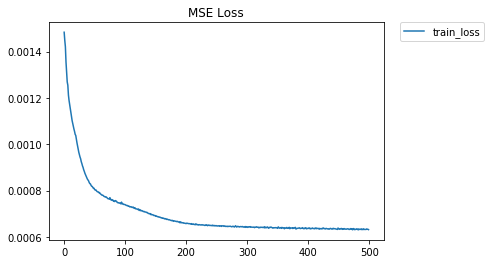

In [153]:
import matplotlib.pyplot as plt
plt.plot(train_losses,label='train_loss')
plt.title('MSE Loss')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [154]:
predictions = pd.DataFrame(preds, columns=['Energy'])
predictions

,Energy
0,0.231175
1,0.231175
2,0.231175
3,0.231175
4,0.231175
...,...
1816,0.299888
1817,0.298367
1818,0.296144
1819,0.300472


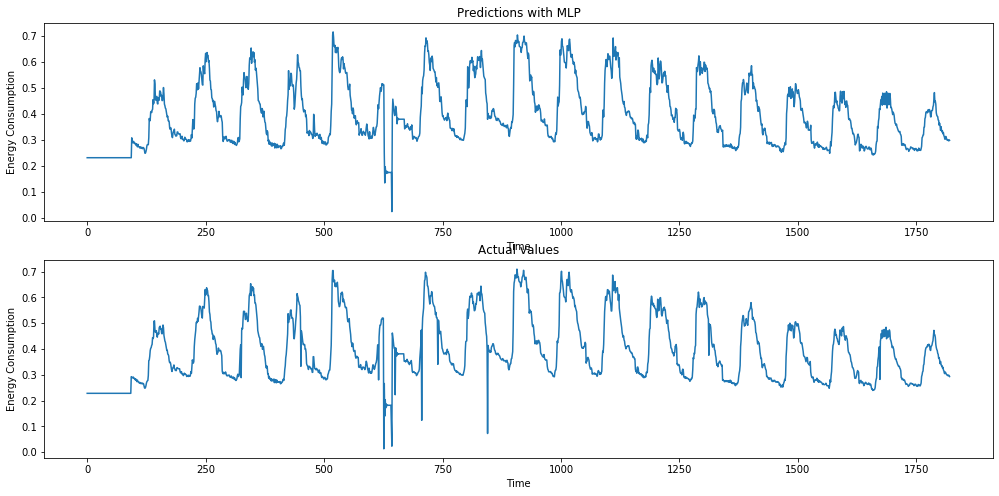

In [108]:
plt.figure(figsize=(17,8))
plt.subplot(2, 1, 1)
plt.title('Predictions with MLP')
plt.xlabel('Time')
plt.ylabel('Energy Consumption')
plt.plot(predictions['Energy'])


plt.subplot(2, 1, 2)
plt.title('Actual values')
plt.xlabel('Time')
plt.ylabel('Energy Consumption')
plt.plot(Y)

plt.show()

In [155]:
predictions.to_csv('predictions_MLP.csv')

# Metrics

In [109]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score
def MAPE(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [127]:
MSE_MLP = MSE(Y, predictions)
RMSE_MLP = MSE(Y, predictions)**(0.5)
MAE_MLP = MAE(Y, predictions)
MAPE_MLP = MAPE(Y, predictions)
R2_MLP = r2_score(Y, predictions)

In [128]:
Metric_MLP = {
    'MSE_MLP':MSE_MLP,
    'RMSE_MLP':RMSE_MLP,
    'MAE_MLP':MAE_MLP,
    'MAPE_MLP':MAPE_MLP,
    'R_Squared_MLP':R2_MLP
}

In [129]:
Metric_MLP

{'MSE_MLP': 0.0006011004106882813,
 'RMSE_MLP': 0.024517349177435175,
 'MAE_MLP': 0.011093448897296333,
 'MAPE_MLP': 5.138919100644299,
 'R_Squared_MLP': 0.9606307439612057}